In [1]:
import sys
import bisect
from collections import OrderedDict

In [2]:
# Loading test kmer data into memory
path = "test/kmers.k31.CL2.fa"
i = 0
kmers = [] # list of all kmer counts, sorted by size later
with open(path) as f:
    for line in f:
        if line[0] == ">":
            num = int(line[1:])
            kmers.append(["", num])
        else:
            kmers[i][0] = line
            i += 1
            if i % 10000000 == 0:
                print(f"line={i}")
print("Done parsing!")

line=10000000
line=20000000
line=30000000
line=40000000
line=50000000
line=60000000
line=70000000
line=80000000
line=90000000
line=100000000
line=110000000
line=120000000
line=130000000
line=140000000
line=150000000
line=160000000
Done parsing!


In [5]:
# Sorting test
import random
random.seed()
lst = []
for i in range(10000000):
    lst.append(random.randint(1, 10000000))

In [8]:
from datetime import datetime
now = datetime.now()
lst.sort()
now2 = datetime.now()
print(now2 - now)

0:00:12.813770


In [9]:
def srt(e):
    return e[1]
print("Sorting...")
kmers.sort(key=srt)
print("Done sorting!")

Sorting...
Done sorting!


In [19]:
def get_size(obj):
    print(f"{sys.getsizeof(obj)/1e9:.3}GB")
get_size(kmers)

1.38GB


In [20]:
# Saving & loading data
def save_as(obj, filename):
    with open(filename, 'w') as f:
        f.write(repr(obj))
def load_obj(filename):
    with open(filename, 'r') as f:
        return ast.literal_eval(f.read())

In [21]:
save_as(kmers, "test/01H002_kmers.py")

KeyboardInterrupt: 

In [ ]:
print("Turning into OrderedDict")
kmer_count = OrderedDict(kmers)
print("All done!")

In [51]:
def elements_after(lst, n):
    # Returns number of elements that are bigger than n in a sorted ascending list
    return len(lst) - bisect.bisect(lst, n)

In [52]:
def count_bigger(n):
    # Returns the number of kmers that are present more than n times
    return elements_after(kmer_counts, n)

In [24]:
bigger_than_count = [] # for each index i, the number of kmers that are present more than i times
for i in range(kmer_counts[-1] + 1):
    bigger_than_count.append(count_bigger(i))

In [53]:
def find_threshold(n):
    # Finds the maximum abundance threshold needed to keep at most n kmers
    return elements_after(list(reversed(bigger_than_count)), n)

In [65]:
# there are 753 kmers present more than 1000000 times
print(count_bigger(1e6))

# to keep the 753 most abundant kmers, the minimum threshold is 998255 (but 1000000 works too)
print(find_threshold(753))

# there are also 753 kmers present more than 998255 times
print(count_bigger(998255))

753
998255
753


In [76]:
print(find_threshold(10000))
print(count_bigger(111092))

111092
10000


In [14]:
import ast
import numpy as np
with open('data/bigger_than_count.py', 'r') as f:
    bigger_than_count = np.array(ast.literal_eval(f.read()))

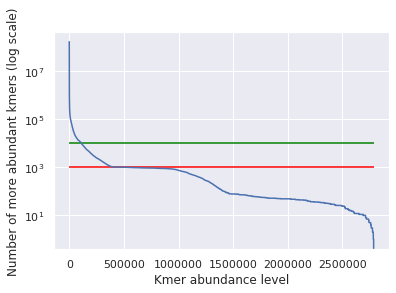

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(bigger_than_count)
plt.xlabel('Kmer abundance level')
plt.ylabel('Number of more abundant kmers (log scale)')
plt.yscale("log")
plt.hlines(10000, 0, len(bigger_than_count), colors="green")
plt.hlines(1000, 0, len(bigger_than_count), colors="red")
plt.show()

In [ ]:
def n_most_common_kmers(d, n):
    return d.items()[-n:]

In [ ]:
# Complete kmer frquency distribution graph for test patient
sns.distplot(kmer_counts.values())
plt.xlabel("Kmer frequency for test patient (01H002)")

In [ ]:
# Compare kmer counts between patients

# Given a list of 10000 kmers (most frequent kmers of test patient)
common = n_most_common_kmers(kmer_counts, 10000)
# For each patient file
files = ["02H043", "03H090", "04H120", "05H072"]
for f in files:
    with open(f"/u/leucegene/data/rnaseq/jellyfish/EXT001/{f}/kmers.k31.CL2.jf") as jf:
        pass
        # Convert to fasta format with jellyfish python interface
        # Go through all kmers
        # If kmer is in the list, save it
        # Make distribution graph of kmer frequencies

# Visually compare graphs